In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# https://www.kaggle.com/datasets/nikhil1e9/loan-default
data=pd.read_csv("Loan_default.csv")
# handel missing valus
data.dropna(axis=0, how='any', inplace=True)
# handel duplicates
data.drop_duplicates()
data

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,8C6S86ESGC,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No,0
255343,98R4KDHNND,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,No,No,Home,No,1
255344,XQK1UUUNGP,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes,0
255345,JAO28CPL4H,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,Yes,Yes,Other,No,0


In [2]:
# split into X and Y
X = data.drop('Default', axis=1)
X = X.drop ('LoanID', axis=1)# Features
y = data['Default'] # labels

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn import tree

In [4]:
# Apply Label Encoding to categorical columns
categorical_columns = ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']
label_encoder = LabelEncoder()
for column in categorical_columns:
    if X[column].dtype == 'object':  # Check if the column contains strings
        X[column] = label_encoder.fit_transform(X[column])

In [5]:
X

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,56,85994,50587,520,80,4,15.23,36,0.44,0,0,0,1,1,4,1
1,69,50432,124440,458,15,1,4.81,60,0.68,2,0,1,0,0,4,1
2,46,84208,129188,451,26,3,21.17,24,0.31,2,3,0,1,1,0,0
3,32,31713,44799,743,0,3,7.07,24,0.23,1,0,1,0,0,1,0
4,60,20437,9139,633,8,4,6.51,48,0.73,0,3,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,19,37979,210682,541,109,4,14.11,12,0.85,0,0,1,0,0,4,0
255343,32,51953,189899,511,14,2,11.55,24,0.21,1,1,0,0,0,3,0
255344,56,84820,208294,597,70,3,5.29,60,0.50,1,2,1,1,1,0,1
255345,42,85109,60575,809,40,1,20.90,48,0.44,1,1,2,1,1,4,0


In [6]:
# split into tranin and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Building the Decision Tree Model (using ID3 algorithm)
# Initializing the Decision Tree Classifier with ID3 algorithm
model = DecisionTreeClassifier(criterion='entropy')

In [7]:
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

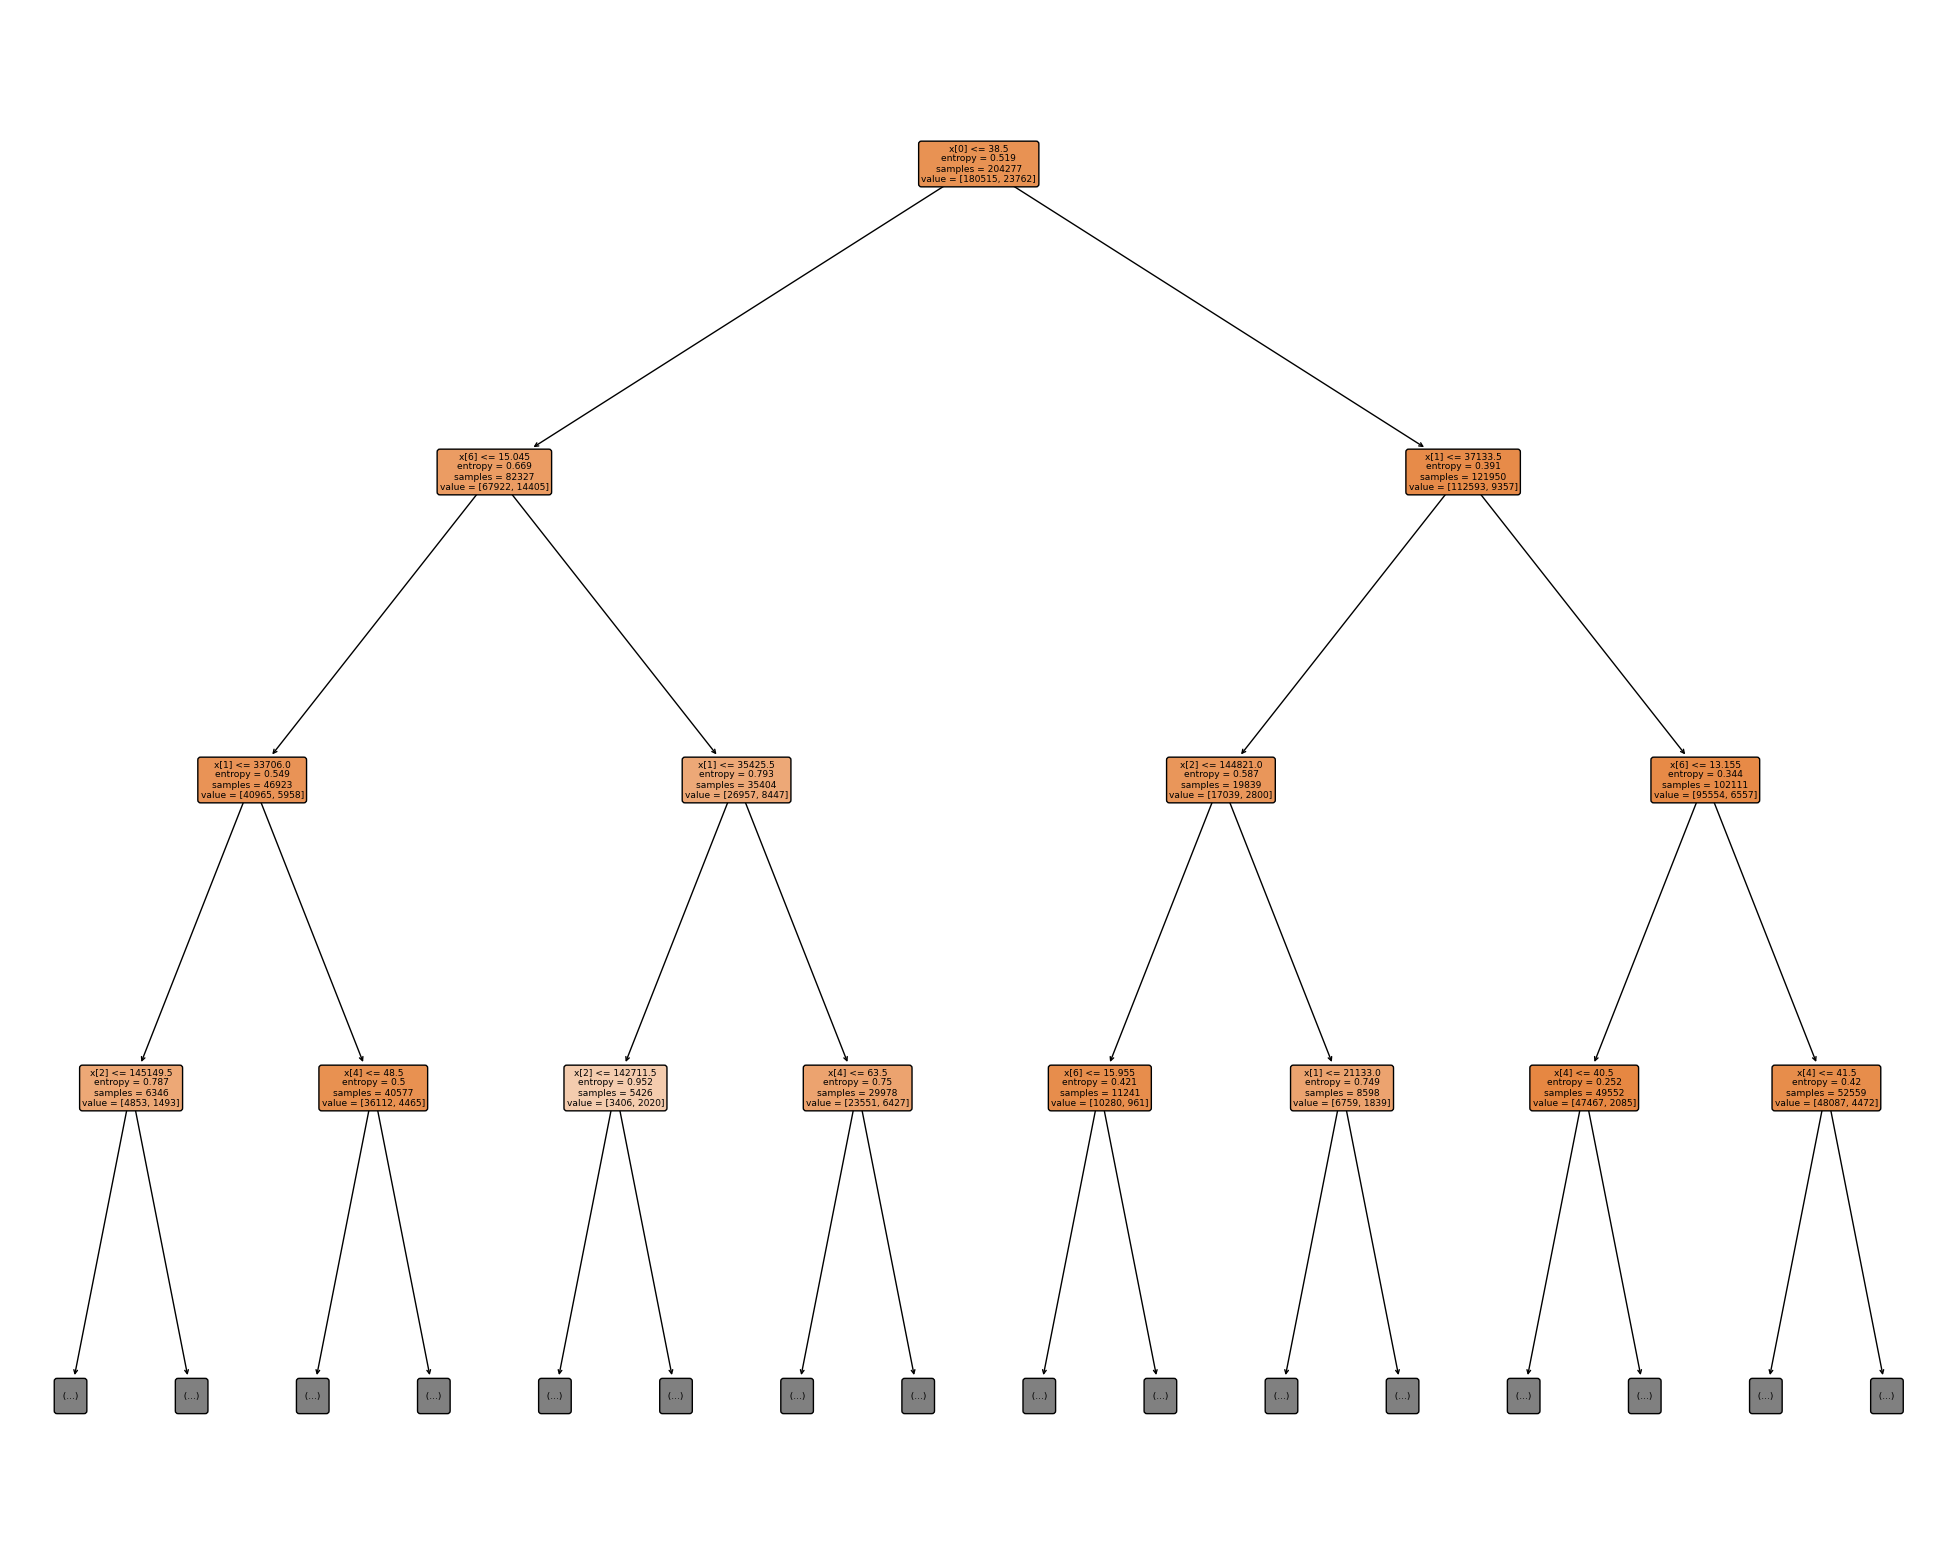

In [8]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(model, filled = True, rounded = True, max_depth=3)
plt.show()

In [9]:
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.81
